# AGH - Deep Learning in Medical Image Analysis I

Author: Marek Wodziński

Contact: wodzinski@agh.edu.pl

You are allowed to use these materials for all purposes as long as the credit is given.

# Laboratory 9 - Medical Image Generation - Part II

## Introduction

The goal of the laboratory is to explore latent spaces from the previously implemented Autoencoder and Variational Autoencoder.

Then, you will implement an extended version of a generative adversarial network - the Wasserstein GAN.

During the laboratory you are going to use exactly the same dataset as during the Laboratory 5 -  https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

Let's start with the required libraries:

In [1]:
import os
import numpy as np
import torch as tc
import torchvision as tv
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import sklearn.manifold as manifold
from torch.utils.tensorboard import SummaryWriter

## Part I - Dataset and Dataloader for Latent Space Exploration

During this laboratory you will need the datalooader from the Laboratory 5 - in exploring latent spaces we will be interested also in the classes.

Let's start with the dataloader from Laboratory 5 - copy the code and verify whether everything works correctly.

In [2]:
data_path = None # TODO
csv_path = None # TODO

In [3]:
# Create the .csv file - as during the Laboratory 5/8

dataset = None # TODO
dataframe = pd.DataFrame(dataset, columns=["Image Path", "Class"])
dataframe.to_csv(csv_path, index=False)
print(f"Dataset size: {len(dataframe)}")

Dataset size: 6432


In [4]:
# TODO - use the dataloader from Laboratory 5 (without replicting the images into 3 channels - as during Laboratory 8)

class XRayDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path, csv_path, class_mapper):
        pass # TODO

    def __len__(self):
        pass # TODO

    def __getitem__(self, idx):
        pass # TODO

Training dataset size: 6432


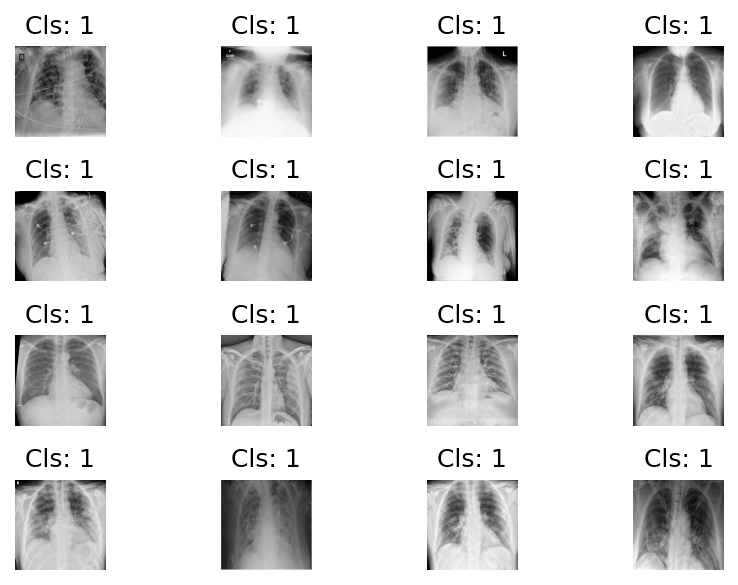

In [7]:
# TODO - show the loaded images

## Part II - Latent Space Exploration

Now copy the AE and VAE models from the Laboratory 8, create the objects and load the pretrained weights saved during completing the previous notebook.

In [12]:
# TODO - use the networks from Laboratory 8

In [ ]:
device = "cuda:0"
ae_model_path = None # TODO
vae_model_path = None # TODO

ae_model = AutoEncoder()
ae_model.load_state_dict(tc.load(ae_model_path))
ae_model.to(device)

vae_model = VariationalAutoEncoder()
vae_model.load_state_dict(tc.load(vae_model_path))
vae_model.to(device)

Now use the **sklearn** library to visualize the latent spaces of both the models.

Start with creating the latent spaces using only the original cases:
<ol>
<li> Propagate all the cases through the encoder and aggregate the embeddings
<li> Use the t-SNE algorithm to reduce the dimensionality of the aggregated embeddings to 2
<li> Prepare a scatter plot presenting the distribution of the embeddings, giving different color for each class
</ol>

Start with creating a function to aggregate the embeddings for a given model:

In [39]:
def aggregate_embeddings(model, dataloader, device="cuda:0"):
    all_embeddings = None
    all_classes = None
    pass # TODO - aggregate all the embeddings and corresponding classes
    return all_embeddings, all_classes

Now aggregate the embeddings and classes for AE and VAE models:

In [40]:
ae_embeddings, ae_classes = aggregate_embeddings(ae_model, dataloader, "cuda:0")
vae_embeddings, vae_classes = aggregate_embeddings(vae_model, dataloader, "cuda:0")

In [41]:
print(f"AE embeddings shape: {ae_embeddings.shape}")
print(f"AE classes shape: {ae_classes.shape}")
print(f"VAE embeddings shape: {vae_embeddings.shape}")
print(f"VAE classes shape: {vae_classes.shape}")

AE embeddings shape: (6432, 256)
AE classes shape: (6432,)
VAE embeddings shape: (6432, 256)
VAE classes shape: (6432,)


Now reduce the dimensionality to 2 using the TSNE algorithm (use the default parameters or play with the perplexity):

In [54]:
ae_reduced = None # TODO
vae_reduced = None # TODO

print(f"AE reduced shape: {ae_reduced.shape}")
print(f"VAE reduced shape: {vae_reduced.shape}")

d:\AGH\Python_392\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
d:\AGH\Python_392\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


AE reduced shape: (6432, 2)
VAE reduced shape: (6432, 2)


And finally use the matplotlib to show the reduced embeddings using a scatter plot, using a different color for each class:

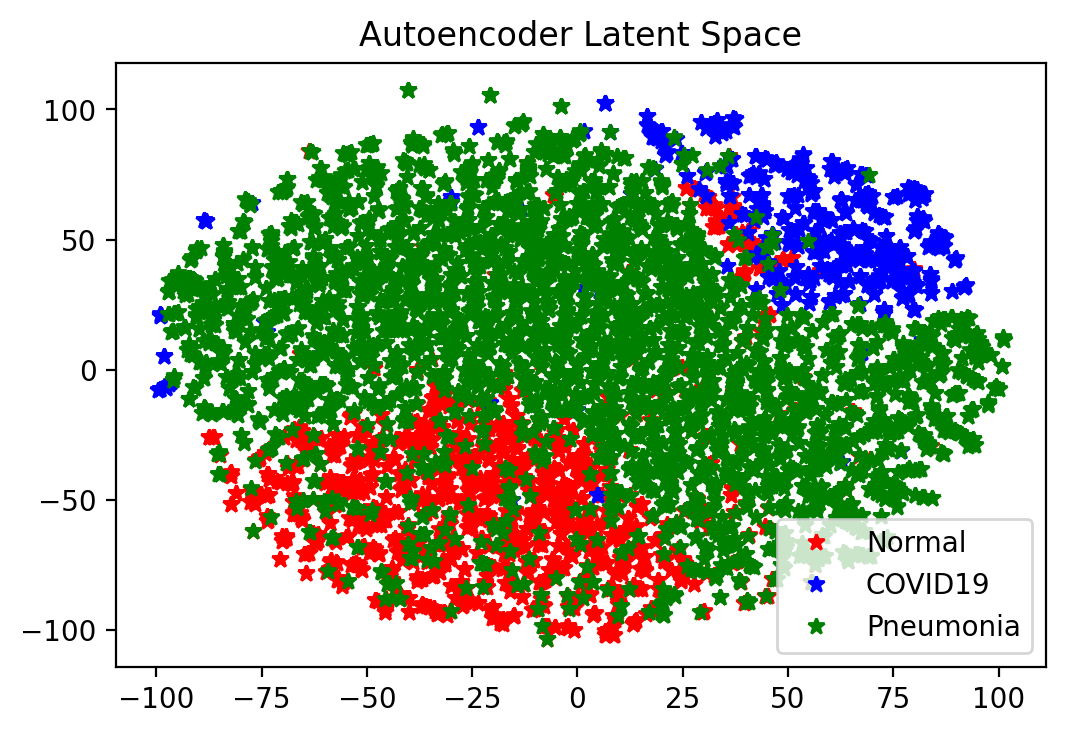

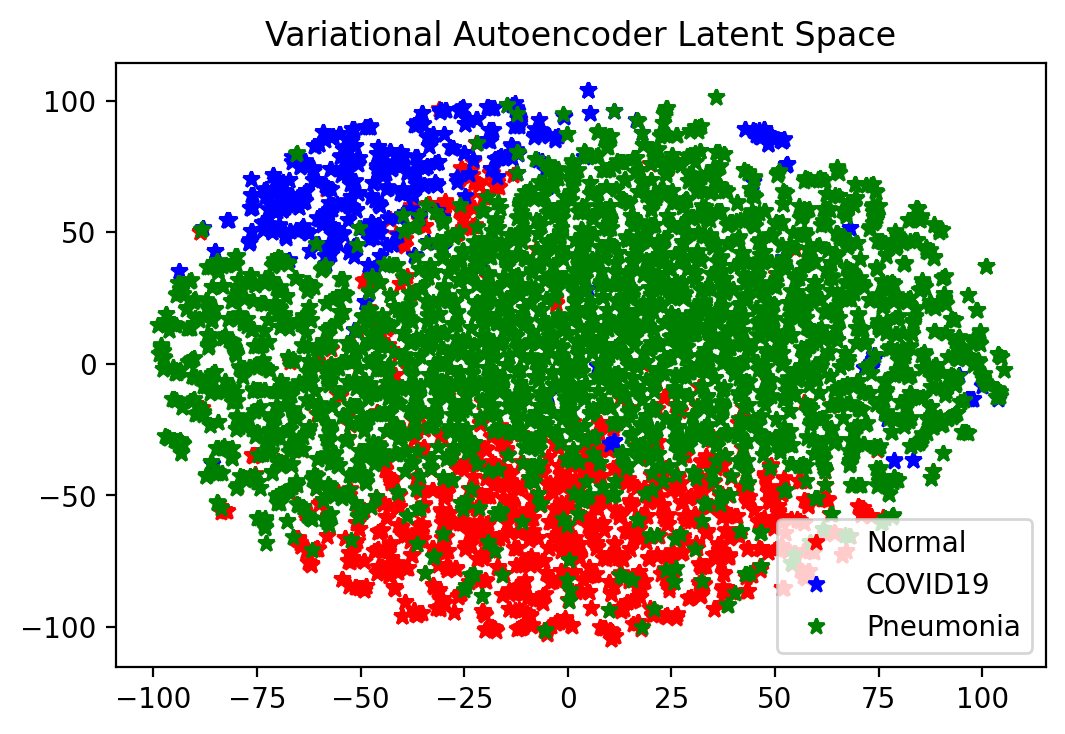

In [55]:
pass # TODO

You have visualized the latent space of the previously implemented generative models. Can you observe the differences? What can you tell about the split between classes? Is it easily visible? Do you have any ideas how to show the embeddings for the randomly generated cases instead of the original ones? Can you do the same after training the classification model? What would you expect to observe?

This is the end of this part of the notebook. The next part can be implemented separately.

## Part IV -  Wasserstein GAN

In this part you are going to implement the Wasserstein GAN for image generation. You are going to implement the Wasserstein version instead of the DCGAN mainly because of the training stability. Please read an article about the differences: https://towardsdatascience.com/deep-convolutional-vs-wasserstein-generative-adversarial-network-183fbcfdce1f

You can use exactly the same architecture for the generator as for the decoder in AE/VAE. For the discriminator - think about a reasonable architecture and implement it on your own. Start with implementing the two networks:

In [5]:
class Generator(tc.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        pass # TODO

    def generate(self, num_samples, device="cpu"):
        pass # TODO

    def forward(self, latent_space):
        pass # TODO

class Discriminator(tc.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        pass # TODO

    def forward(self, x):
        pass # TODO

Now create the models and verify whether the signals are propagated correctly:

In [6]:
device = "cuda:0"
generator = Generator().to(device)
discriminator = Discriminator().to(device)

generated_samples = generator.generate(16, device=device)
discriminated_samples = discriminator(generated_samples)

print(f"Generated samples shape: {generated_samples.shape}")
print(f"Discriminated embeddings shape: {discriminated_samples.shape}")

Generated samples shape: torch.Size([16, 1, 224, 224])
Discriminated embeddings shape: torch.Size([16, 256])


Next, implement a training loop. This time, again, you are not going to create any training/validation/testing split because we are interested mostly in the generation quality. Implement a training loop similar to Laboratory 8, however, this time implement the Wasserstein GAN training scheme. 

Hint: The training of GANs is more difficult than AE/VAE and requires several steps to be performed sequentially. It may be useful to implement the training strategy in a dedicated WGANTrainer class to simplify the operations.

In [7]:
def training(generator, discriminator, dataloader, generator_optimizer, discriminator_optimizer, num_epochs, logger, device):
    pass # TODO

Create an instance of the Tensorboard:

In [78]:
%load_ext tensorboard
%tensorboard --logdir /content/logs/WGAN

And run the training:

In [8]:
batch_size = 8
shuffle = True
class_mapper = {'NORMAL': 0, "COVID19": 1, "PNEUMONIA": 2}
dataset = XRayDataset(data_path, csv_path, class_mapper)
dataloader = tc.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
learning_rate = 0.003
generator_optimizer = tc.optim.Adam(generator.parameters(), lr=learning_rate)
discriminator_optimizer = tc.optim.Adam(discriminator.parameters(), lr=learning_rate)
num_epochs = 50
logger_path = None # TODO
logger = SummaryWriter(logger_path, comment="WGAN")

In [17]:
training(generator, discriminator, dataloader, generator_optimizer, discriminator_optimizer, num_epochs, logger, device)

Now verify whether the trained network is able to generate new, synthetic samples:

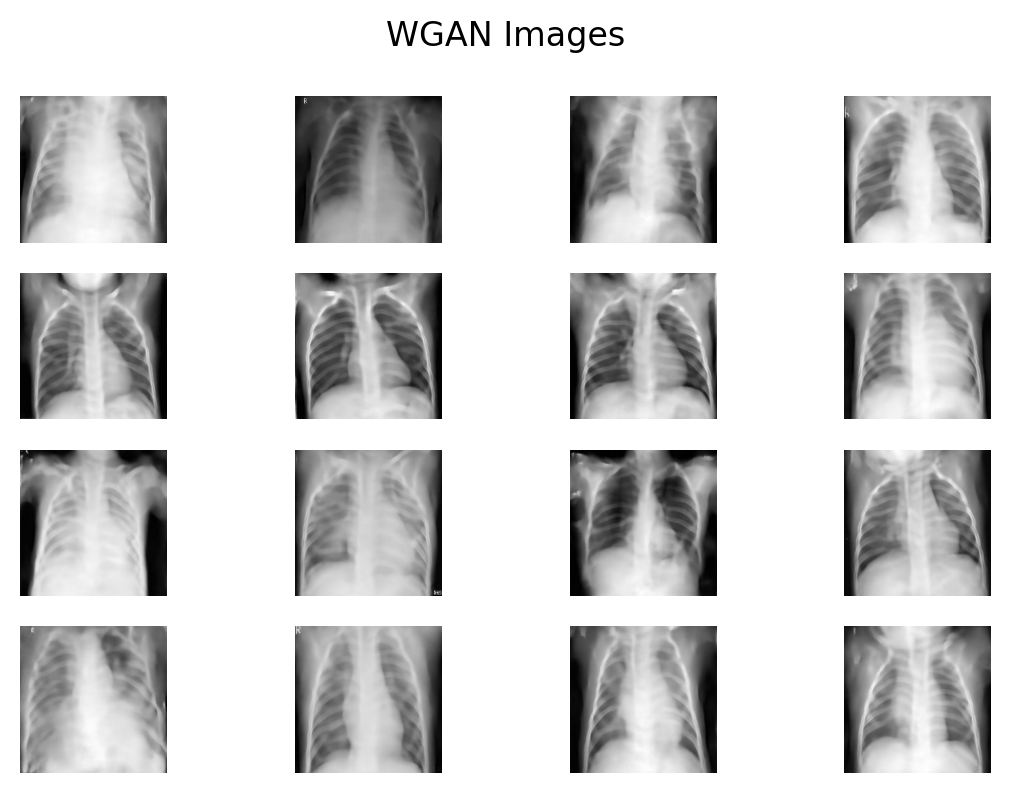

In [16]:
pass # TODO

What can you say about the generated samples? Are they better or worse than the ones from AE/VAE? Why? Do you see what could be improved?

## Conclusion

This is the end of Laboratory 9. You should be now familiar with:
<ol>
  <li> Exploring the latent spaces using T-SNE as the nonlinear dimensionality reduction method.
  <li> How to implement the Wassterstein GAN for image generation.
</ol>

Note that the quality of images generated by Wasserstein GAN should be slightly higher than the ones from the AE or VAE. Why? Try to visualize the latent space to understand the model behavior.